In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from skimage import data
from skimage.color import rgb2gray
from PIL import Image
import seaborn as sns

In [2]:
def read_img(name, num, ext):
    img_to_recognize = img.imread(name + str(num) + ext)
    img_to_recognize = Image.fromarray(np.uint8(img_to_recognize))
    img_to_recognize = img_to_recognize.resize((150, 150))
    img_to_recognize = img_to_recognize.convert('L')
    img_to_recognize = np.array(img_to_recognize)
    return img_to_recognize.flatten()

In [3]:
def display_image_ind(matrix, index):
    # Displays the image present in the row_{index} of the specified matrix
    resized = np.resize(matrix[index], (150, 150))
    plt.imshow(resized, cmap="gray")


def display_image(matrix):
    # Displays the image present in the row_{index} of the specified matrix
    resized = np.resize(matrix, (150, 150))
    plt.imshow(resized, cmap="gray")


def plot_portraits(images, titles, h, w, n_row, n_col):
    plt.figure(figsize=(2.2 * n_col, 2.2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())

In [4]:
avg_nicole = np.zeros((150, 150)) # Matrix that will later become the "average" image
nicoles = [] # List that will house all individual arrays of images, will become a matrix later
count = 1

for nicole in os.listdir('faces'):
    # Converts images to correct size and changes its color to grayscale
    img_nicole = img.imread(os.path.join('faces',nicole))
    img_nicole = Image.fromarray(np.uint8(img_nicole))
    img_nicole = img_nicole.convert('L')
    img_nicole = img_nicole.resize((150, 150))

    # Turns those images into an array and append them to a list that will become a matrix of images later
    array_nicole = np.array(img_nicole)
    avg_nicole += array_nicole
    nicoles.append(array_nicole.flatten()/255)
    count += 1
    if count > 999:
        break


In [5]:
celebrity_photos=os.listdir('faces')[1:1001]
celebrity_names=[name[:name.find('0')-1].replace("_", " ") for name in celebrity_photos]


In [6]:
image_matrix = np.row_stack(tuple(nicoles))


In [7]:
def pca(X, n_pc):
    mean = np.mean(X, axis=0)
    centered_data = X-mean
    U, S, Vh = np.linalg.svd(centered_data, full_matrices=False)
    components = Vh[:n_pc]
    # projected = U[:,:n_pc]*S[:n_pc]
    
    return components, mean, centered_data, S[:n_pc]


In [8]:
Vh, average_matrix, subtracted, eigenvalues = pca(image_matrix, n_pc=150)
eigenfaces = Vh.reshape((150, 150, 150))


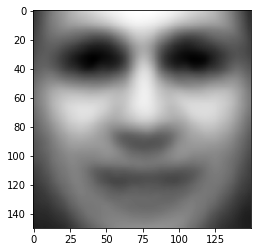

In [9]:
display_image(average_matrix)

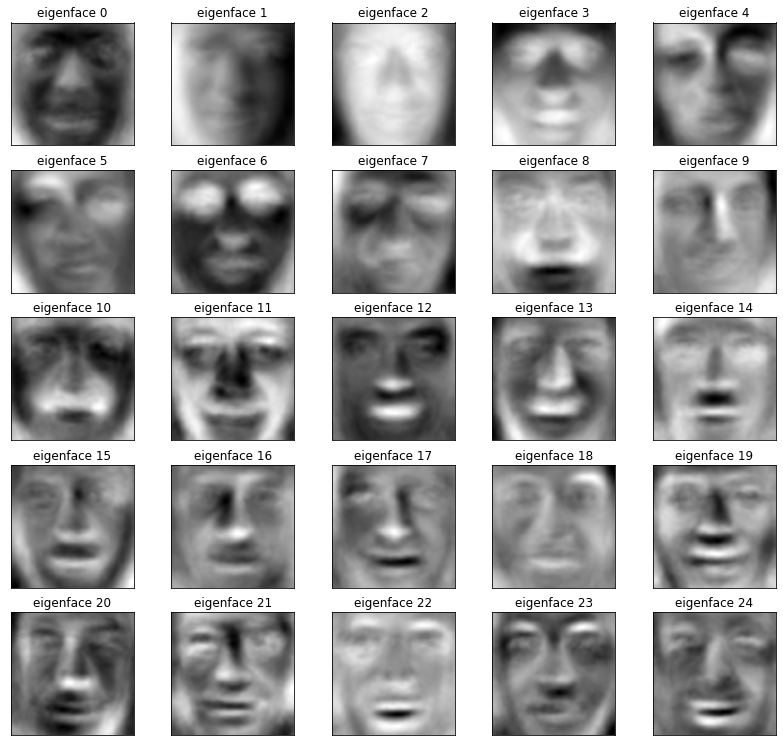

In [10]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_portraits(eigenfaces, eigenface_titles, 150, 150, 5, 5) 


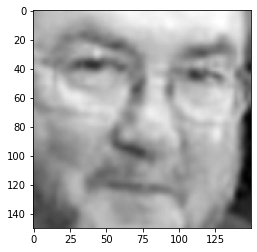

In [11]:
display_image_ind(image_matrix, 607)


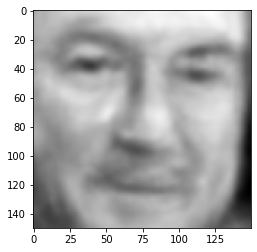

In [12]:
def reconstruction(sub, C, M, h, w, image_index):
    n_samples, n_features = sub.shape
    weights = np.dot(sub, C.T)
    centered_vector=np.dot(weights[image_index, :], C)
    recovered_image=(M+centered_vector).reshape(h, w)
    return recovered_image

display_image(reconstruction(subtracted, Vh, average_matrix, 150, 150, 607))


In [24]:
def recognize(nicole_num):
    # Treats input image (the one we wish to recognize)
    img_to_recognize = read_img('faces/Emma_Watson_000', nicole_num, '.pgm')
    # img_to_recognize = read_img('images/Chaleira_000', nicole_num, '.jpg')
    subtracted_matrix_rec = img_to_recognize - average_matrix
    
    subtracted_matrix_rec = subtracted_matrix_rec.flatten()
    # Projeção da imagem já subtraída da média no face space para obter o array de coeficientes (pesos de cada eigenface)
    eigenfaces_matrix = Vh[:33,:]


    weight = np.dot(subtracted_matrix_rec, eigenfaces_matrix.T)

    projection = eigenfaces_matrix.T @ weight

    proj_error = np.linalg.norm(subtracted_matrix_rec - projection)

    return proj_error
    




recognize(1)
    

7148.761515273371

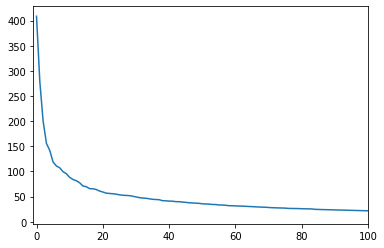

In [14]:
plt.plot(eigenvalues)
plt.xticks(range(0,200,20))
plt.xlim(-1, 100)
plt.show()